In [1]:
#Importing Packages
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading Data
train = pd.read_csv('train_yaOffsB.csv')
test = pd.read_csv('test_pFkWwen.csv')

In [3]:
train.head(2)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1


In [4]:
test.head(2)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2


##### Data Description
    Variable	Definition
    ID	UniqueID
    Estimated_Insects_Count	Estimated insects count per square meter
    Crop_Type	Category of Crop(0,1)
    Soil_Type	Category of Soil (0,1)
    Pesticide_Use_Category	Type of pesticides uses (1- Never, 2-Previously Used, 3-Currently Using)
    Number_Doses_Week	Number of doses per week
    Number_Weeks_Used	Number of weeks used
    Number_Weeks_Quit	Number of weeks quit
    Season	Season Category (1,2,3)
    Crop_Damage	Crop Damage Category (0=alive, 1=Damage due to other causes, 2=Damage due to Pesticides)


In [5]:
#Checking for Null Values in both train and test data

In [6]:
round(train.isnull().sum()/train.shape[0]*100,2)

ID                          0.00
Estimated_Insects_Count     0.00
Crop_Type                   0.00
Soil_Type                   0.00
Pesticide_Use_Category      0.00
Number_Doses_Week           0.00
Number_Weeks_Used          10.13
Number_Weeks_Quit           0.00
Season                      0.00
Crop_Damage                 0.00
dtype: float64

In [7]:
round(test.isnull().sum()/test.shape[0]*100,2)

ID                         0.00
Estimated_Insects_Count    0.00
Crop_Type                  0.00
Soil_Type                  0.00
Pesticide_Use_Category     0.00
Number_Doses_Week          0.00
Number_Weeks_Used          9.94
Number_Weeks_Quit          0.00
Season                     0.00
dtype: float64

In [ ]:
#Imputing Missing Values

In [8]:
import seaborn as sns

<AxesSubplot:xlabel='Number_Weeks_Used', ylabel='count'>

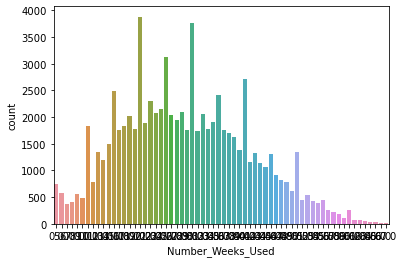

In [9]:
sns.countplot(train['Number_Weeks_Used'])

In [10]:
train['Number_Weeks_Used'].unique()

array([ 0., nan, 26., 20., 15., 14., 19., 24.,  8., 23., 25., 28., 29.,
       22., 21., 17., 30., 35., 32., 27., 16., 31., 33., 34., 39., 38.,
       42., 40., 41., 36., 44., 37., 46., 45., 47., 43., 50., 10., 49.,
       53., 48., 51., 54., 52., 55., 56., 61., 18., 57., 62., 60., 63.,
       66., 59., 64., 13.,  7.,  5., 12.,  6.,  9., 58., 11., 65., 67.])

In [11]:
np.mean(train['Number_Weeks_Used'])

28.62397004683313

In [12]:
np.mean(test['Number_Weeks_Used'])

28.70509388396952

In [13]:
train['Number_Weeks_Used'] = train['Number_Weeks_Used'].fillna(29.0)

In [14]:
test['Number_Weeks_Used'] = test['Number_Weeks_Used'].fillna(29.0)

In [15]:
train.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [16]:
test.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

In [17]:
#Data Analysis

In [18]:
train.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [19]:
train.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.662056,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,11.748115,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,29.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


<AxesSubplot:xlabel='Crop_Damage', ylabel='count'>

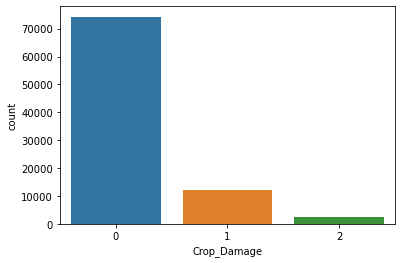

In [20]:
sns.countplot(x='Crop_Damage', data=train)

In [21]:
#To get the count of unique values:
train['Crop_Damage'].value_counts()

0    74238
1    12307
2     2313
Name: Crop_Damage, dtype: int64

array([[<AxesSubplot:title={'center':'Crop_Damage'}>,
        <AxesSubplot:title={'center':'Crop_Type'}>,
        <AxesSubplot:title={'center':'Estimated_Insects_Count'}>],
       [<AxesSubplot:title={'center':'Number_Doses_Week'}>,
        <AxesSubplot:title={'center':'Number_Weeks_Quit'}>,
        <AxesSubplot:title={'center':'Number_Weeks_Used'}>],
       [<AxesSubplot:title={'center':'Pesticide_Use_Category'}>,
        <AxesSubplot:title={'center':'Season'}>,
        <AxesSubplot:title={'center':'Soil_Type'}>]], dtype=object)

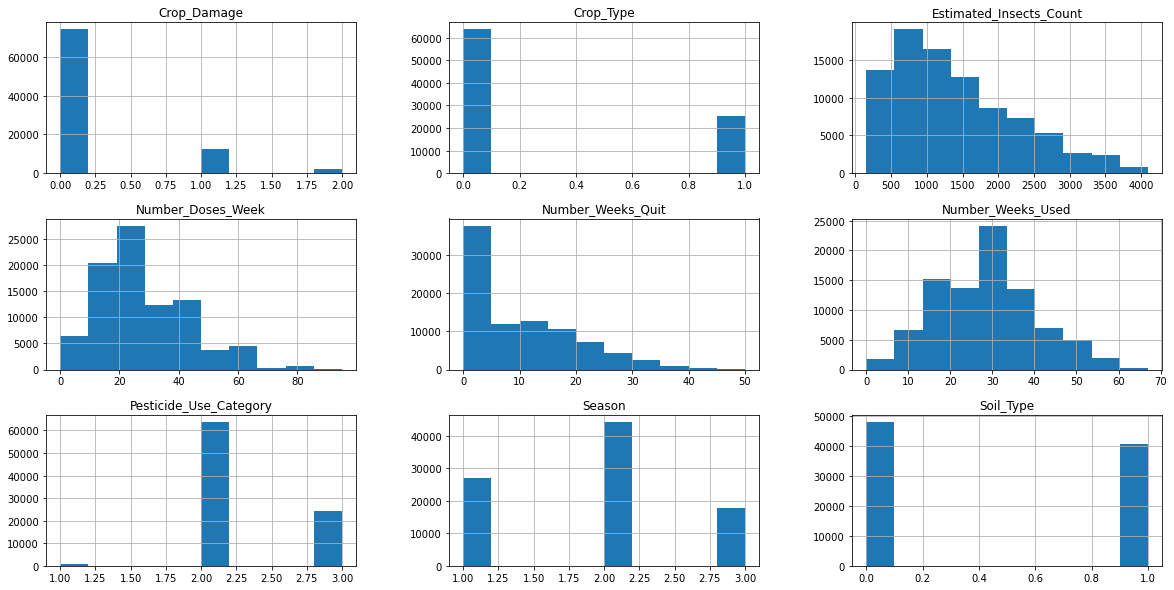

In [22]:
#Histogram to check for Data Distribution(skew) and outliers
train.hist(figsize=(20,10))

In [23]:
from scipy.stats import skew

In [24]:
train.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [25]:
num_features = ['Estimated_Insects_Count','Number_Doses_Week','Number_Weeks_Used','Number_Weeks_Quit']
skew(train[num_features])

array([0.83913147, 0.96286232, 0.24824378, 0.89275746])

<AxesSubplot:xlabel='Estimated_Insects_Count'>

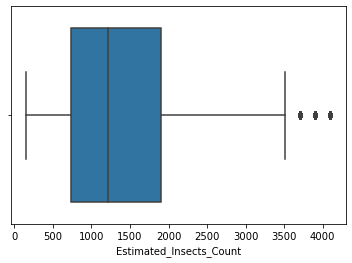

In [26]:
sns.boxplot(x=train['Estimated_Insects_Count'])

In [27]:
train_df = train

In [28]:
test_df = test

In [29]:
cat_features = ['Crop_Type','Soil_Type','Pesticide_Use_Category','Season']

In [30]:
train_df[cat_features] = train[cat_features].astype(str)
test_df[cat_features] = test_df[cat_features].astype(str)

In [31]:
train_df.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                   object
Soil_Type                   object
Pesticide_Use_Category      object
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                      object
Crop_Damage                  int64
dtype: object

In [32]:
test_df.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                   object
Soil_Type                   object
Pesticide_Use_Category      object
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                      object
dtype: object

In [33]:
#Dropping ID from both train and test dataset
train_df.drop('ID', axis=1, inplace=True)
test_id = test_df['ID']
test_df.drop('ID', axis=1, inplace=True)

In [34]:
train_df.head(2)

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1


In [36]:
test_df.head(2)

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,1,1,0,29.0,0,2
1,410,1,1,1,0,0.0,0,2


In [37]:
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)

In [38]:
X = train_df.drop('Crop_Damage', axis=1)
y = train_df['Crop_Damage']

In [39]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, RepeatedStratifiedKFold

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

In [42]:
score = accuracy_score(y_test, pred_lr)

In [43]:
score

0.8323955285467777

In [44]:
y_pred_lr = lr.predict(test_df)

In [201]:
#saving the mapping to a dictionary
import pickle
pickle_path = "./y_pred_lr.pkl"
pickle_mapping = open(pickle_path,"wb")
pickle.dump(y_pred_lr, pickle_mapping)
pickle_mapping.close()

In [58]:
submission = pd.DataFrame(columns=['ID','Crop_Damage'])
submission['ID'] = test_id
submission['Crop_Damage'] = y_pred_lr
submission.to_csv('submission_lr.csv', index=False)

In [45]:
#Hyper Parameter Tuning

In [ ]:
model = LogisticRegression()
solvers = ['newton-cg', 'sag', 'lbfgs']
penalty = ['l2']
C = [0.01, 0.1, 1.0, 10, 100]
param = dict(solver=solvers, penalty=penalty, C=C)
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
random_search = RandomizedSearchCV(estimator=model, param_distributions=param, cv=5, scoring='accuracy')
random_result = random_search.fit(X_train, y_train)

In [70]:
print(random_result.best_score_, random_result.best_params_)

0.8394051446945336 {'solver': 'newton-cg', 'penalty': 'l2', 'C': 1.0}


In [73]:
model_lr = LogisticRegression(solver='newton-cg', penalty='l2',C=1.0)
model_lr.fit(X_train, y_train)

LogisticRegression(solver='newton-cg')

In [75]:
y_pred_lr_tuned = model_lr.predict(X_test)

In [76]:
score = accuracy_score(y_test, y_pred_lr_tuned)

In [77]:
score

0.8370470402880936

In [83]:
y_pred_lr_1 = model_lr.predict(test_df)

In [202]:
pickle_path = "./y_pred_lr_1.pkl"
pickle_mapping = open(pickle_path,"wb")
pickle.dump(y_pred_lr_1, pickle_mapping)
pickle_mapping.close()

In [84]:
submission_lr_1 = pd.DataFrame(columns=['ID','Crop_Damage'])
submission_lr_1['ID'] = test_id
submission_lr_1['Crop_Damage'] = y_pred_lr_1
submission_lr_1.to_csv('submission_lr_tuned.csv', index=False)

In [79]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

In [80]:
score = accuracy_score(y_test, pred_rf)
score

0.8218170905544302

In [85]:
y_pred_rf = rf.predict(test_df)

In [203]:
pickle_path = "./y_pred_rf.pkl"
pickle_mapping = open(pickle_path,"wb")
pickle.dump(y_pred_rf, pickle_mapping)
pickle_mapping.close()

In [86]:
submission_rf = pd.DataFrame(columns=['ID','Crop_Damage'])
submission_rf['ID'] = test_id
submission_rf['Crop_Damage'] = y_pred_rf
submission_rf.to_csv('submission_rf.csv', index=False)

In [64]:
import matplotlib.pyplot as plt

<AxesSubplot:>

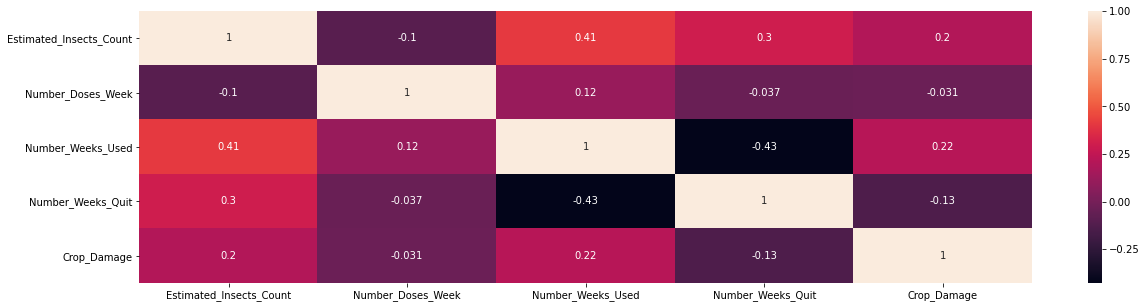

In [69]:
### correlation
plt.figure(figsize=(20,5))
sns.heatmap(train.corr(), annot=True)

In [87]:
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier

In [89]:
from lightgbm import LGBMModel,LGBMClassifier

In [90]:
def find_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [91]:
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()
lgbm = LGBMClassifier()

models = [logreg, logreg_cv, rf, gboost, lgbm]

for model in models:
    print('Cross-validation of : {0}'.format(model.__class__))
    score = find_score(clf=model, X=X_train, y=y_train, scoring='accuracy')
    print('CV score = {0}'.format(score))
    print('****')

Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegression'>
CV score = 0.8326848874598071
****
Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegressionCV'>
CV score = 0.835128617363344
****
Cross-validation of : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
CV score = 0.8243086816720258
****
Cross-validation of : <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
CV score = 0.8456913183279744
****
Cross-validation of : <class 'lightgbm.sklearn.LGBMClassifier'>
CV score = 0.8478456591639871
****


In [92]:
model_rf = RandomForestClassifier()
n_estimators = [10, 50, 100, 200]
max_depth = [4, 6, 8, 10]
max_features =  ['sqrt', 'auto', 'log2']
min_samples_split = [2, 3, 5, 10]
min_samples_leaf = [3, 5, 10] 
bootstrap = [True, False]
grid = dict(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features, min_samples_split = min_samples_split, min_samples_leaf=min_samples_leaf, bootstrap=bootstrap)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
random_search = RandomizedSearchCV(estimator=model_rf, param_distributions=grid, n_jobs=-1, cv=cv, scoring='accuracy')
random_result = random_search.fit(X_train,y_train)

In [93]:
random_result.best_params_

{'n_estimators': 50,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [94]:
random_result.best_score_

0.8431457663451233

In [98]:
model_rf_tuned = RandomForestClassifier(n_estimators=50, min_samples_split=3, min_samples_leaf=2, max_features='sqrt', max_depth=10, bootstrap=True)

In [99]:
model_rf_tuned.fit(X_train, y_train)
y_test_rf_tuned = model_rf_tuned.predict(X_test)

In [100]:
score = accuracy_score(y_test, y_test_rf_tuned)
score

0.8402355765623828

In [102]:
y_pred_rf_tuned = model_rf_tuned.predict(test_df)

In [204]:
pickle_path = "./y_pred_rf_tuned.pkl"
pickle_mapping = open(pickle_path,"wb")
pickle.dump(y_pred_rf_tuned, pickle_mapping)
pickle_mapping.close()

In [103]:
submission_rf_tuned = pd.DataFrame(columns=['ID','Crop_Damage'])
submission_rf_tuned['ID'] = test_id
submission_rf_tuned['Crop_Damage'] = y_pred_rf_tuned
submission_rf_tuned.to_csv('submission_rf_tuned.csv', index=False)

## LightGBM

In [104]:
lgbm = LGBMClassifier()

In [106]:
lgbm.fit(X_train, y_train)

LGBMClassifier()

In [108]:
y_test_lgbm = lgbm.predict(X_test)

In [110]:
score = accuracy_score(y_test, y_test_lgbm)
score

0.844774551729312

In [111]:
y_pred_lgbm = lgbm.predict(test_df)

In [205]:
pickle_path = "./y_pred_lgbm.pkl"
pickle_mapping = open(pickle_path,"wb")
pickle.dump(y_pred_lgbm, pickle_mapping)
pickle_mapping.close()

In [112]:
submission_lgbm = pd.DataFrame(columns=['ID','Crop_Damage'])
submission_lgbm['ID'] = test_id
submission_lgbm['Crop_Damage'] = y_pred_lgbm
submission_lgbm.to_csv('submission_lgbm.csv', index=False)

In [114]:
pip install catboost

  Created wheel for retrying: filename=retrying-1.3.3-cp37-none-any.whl size=11435 sha256=c084c53887644136918fe3b6c3d82a06e7f0ecf1885c1548bd8f824a5d4e7ad2
  Stored in directory: D:\Users\pgupta43\AppData\Local\pip\Cache\wheels\d7\a9\33\acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [116]:
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

In [119]:
cc = CatBoostClassifier(learning_rate=0.1, iterations=5)
xg = XGBClassifier()
models = [cc, xg]

for model in models:
    print('Cross-validation of : {0}'.format(model.__class__))
    score = find_score(clf=model, X=X_train, y=y_train, scoring='accuracy')
    print('CV score = {0}'.format(score))
    print('****')

Cross-validation of : <class 'catboost.core.CatBoostClassifier'>
0:	learn: 0.9799873	total: 112ms	remaining: 448ms
1:	learn: 0.8907913	total: 261ms	remaining: 391ms
2:	learn: 0.8201014	total: 370ms	remaining: 247ms
3:	learn: 0.7632640	total: 475ms	remaining: 119ms
4:	learn: 0.7157590	total: 518ms	remaining: 0us
0:	learn: 0.9798500	total: 62.1ms	remaining: 248ms
1:	learn: 0.8909236	total: 109ms	remaining: 163ms
2:	learn: 0.8202578	total: 260ms	remaining: 173ms
3:	learn: 0.7629900	total: 388ms	remaining: 97.1ms
4:	learn: 0.7161418	total: 463ms	remaining: 0us
0:	learn: 0.9800855	total: 52.9ms	remaining: 211ms
1:	learn: 0.8909525	total: 107ms	remaining: 160ms
2:	learn: 0.8202584	total: 170ms	remaining: 113ms
3:	learn: 0.7626492	total: 241ms	remaining: 60.4ms
4:	learn: 0.7153027	total: 298ms	remaining: 0us
0:	learn: 0.9798108	total: 75ms	remaining: 300ms
1:	learn: 0.8897938	total: 154ms	remaining: 231ms
2:	learn: 0.8190732	total: 192ms	remaining: 128ms
3:	learn: 0.7618107	total: 233ms	remai

In [120]:
cc = CatBoostClassifier(learning_rate=0.03, iterations=100)
models = [cc]

for model in models:
    print('Cross-validation of : {0}'.format(model.__class__))
    score = find_score(clf=model, X=X_train, y=y_train, scoring='accuracy')
    print('CV score = {0}'.format(score))
    print('****')

Cross-validation of : <class 'catboost.core.CatBoostClassifier'>
0:	learn: 1.0616745	total: 106ms	remaining: 10.5s
1:	learn: 1.0279426	total: 157ms	remaining: 7.67s
2:	learn: 0.9965758	total: 212ms	remaining: 6.86s
3:	learn: 0.9674138	total: 269ms	remaining: 6.46s
4:	learn: 0.9403773	total: 334ms	remaining: 6.34s
5:	learn: 0.9150176	total: 378ms	remaining: 5.92s
6:	learn: 0.8913483	total: 424ms	remaining: 5.63s
7:	learn: 0.8693988	total: 470ms	remaining: 5.41s
8:	learn: 0.8486905	total: 548ms	remaining: 5.54s
9:	learn: 0.8292259	total: 595ms	remaining: 5.36s
10:	learn: 0.8108717	total: 660ms	remaining: 5.34s
11:	learn: 0.7935983	total: 738ms	remaining: 5.41s
12:	learn: 0.7772738	total: 776ms	remaining: 5.19s
13:	learn: 0.7619367	total: 851ms	remaining: 5.23s
14:	learn: 0.7471425	total: 899ms	remaining: 5.09s
15:	learn: 0.7331561	total: 952ms	remaining: 5s
16:	learn: 0.7200901	total: 1.03s	remaining: 5.02s
17:	learn: 0.7076272	total: 1.08s	remaining: 4.94s
18:	learn: 0.6957616	total: 1.

63:	learn: 0.4762752	total: 6.95s	remaining: 3.91s
64:	learn: 0.4744826	total: 7.19s	remaining: 3.87s
65:	learn: 0.4732974	total: 7.29s	remaining: 3.75s
66:	learn: 0.4716396	total: 7.51s	remaining: 3.7s
67:	learn: 0.4700903	total: 7.6s	remaining: 3.58s
68:	learn: 0.4686203	total: 7.67s	remaining: 3.44s
69:	learn: 0.4671916	total: 7.74s	remaining: 3.32s
70:	learn: 0.4657396	total: 7.84s	remaining: 3.2s
71:	learn: 0.4644011	total: 7.97s	remaining: 3.1s
72:	learn: 0.4631637	total: 8.12s	remaining: 3s
73:	learn: 0.4619526	total: 8.27s	remaining: 2.9s
74:	learn: 0.4606482	total: 8.5s	remaining: 2.83s
75:	learn: 0.4596563	total: 8.68s	remaining: 2.74s
76:	learn: 0.4584270	total: 8.83s	remaining: 2.64s
77:	learn: 0.4574786	total: 9.07s	remaining: 2.56s
78:	learn: 0.4565845	total: 9.25s	remaining: 2.46s
79:	learn: 0.4555831	total: 9.35s	remaining: 2.34s
80:	learn: 0.4547235	total: 9.42s	remaining: 2.21s
81:	learn: 0.4537623	total: 9.48s	remaining: 2.08s
82:	learn: 0.4528696	total: 9.56s	remain

27:	learn: 0.6125630	total: 3.71s	remaining: 9.55s
28:	learn: 0.6052077	total: 3.78s	remaining: 9.26s
29:	learn: 0.5983886	total: 3.84s	remaining: 8.95s
30:	learn: 0.5917359	total: 3.88s	remaining: 8.63s
31:	learn: 0.5853453	total: 3.94s	remaining: 8.37s
32:	learn: 0.5792085	total: 3.97s	remaining: 8.06s
33:	learn: 0.5734833	total: 4.04s	remaining: 7.84s
34:	learn: 0.5679324	total: 4.1s	remaining: 7.62s
35:	learn: 0.5626606	total: 4.16s	remaining: 7.39s
36:	learn: 0.5575405	total: 4.23s	remaining: 7.2s
37:	learn: 0.5527259	total: 4.27s	remaining: 6.97s
38:	learn: 0.5480348	total: 4.34s	remaining: 6.79s
39:	learn: 0.5435054	total: 4.46s	remaining: 6.69s
40:	learn: 0.5391112	total: 4.57s	remaining: 6.58s
41:	learn: 0.5349025	total: 4.66s	remaining: 6.44s
42:	learn: 0.5309073	total: 4.76s	remaining: 6.31s
43:	learn: 0.5271650	total: 4.81s	remaining: 6.12s
44:	learn: 0.5235722	total: 4.86s	remaining: 5.94s
45:	learn: 0.5200586	total: 4.91s	remaining: 5.76s
46:	learn: 0.5166922	total: 4.94s

89:	learn: 0.4481521	total: 7.69s	remaining: 855ms
90:	learn: 0.4473097	total: 8.04s	remaining: 795ms
91:	learn: 0.4466707	total: 8.22s	remaining: 715ms
92:	learn: 0.4460234	total: 8.36s	remaining: 629ms
93:	learn: 0.4455053	total: 8.43s	remaining: 538ms
94:	learn: 0.4450809	total: 8.46s	remaining: 445ms
95:	learn: 0.4444038	total: 8.63s	remaining: 360ms
96:	learn: 0.4439207	total: 8.88s	remaining: 275ms
97:	learn: 0.4433843	total: 9.1s	remaining: 186ms
98:	learn: 0.4428147	total: 9.17s	remaining: 92.6ms
99:	learn: 0.4423597	total: 9.34s	remaining: 0us
CV score = 0.8425401929260449
****


In [ ]:
#Hyper Parameter Tuning LGBM

In [128]:
from sklearn.metrics import SCORERS

In [129]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [146]:
model_lgbm = LGBMClassifier()
boosting_type = ['gbdt','dart','goss']
num_leaves = [10, 20, 30, 40, 50]
max_depth = [-1, 5, 10, 15, 20]
learning_rate = [0.03, 0.07, 0.3]
n_estimators = [100, 200, 300, 400, 500]
min_child_samples = [20, 40]
colsample_bytree = [0.5, 1]
reg_alpha = [2]
reg_lambda = [2]
param = dict(boosting_type=boosting_type, num_leaves=num_leaves, max_depth=max_depth, learning_rate=learning_rate,
            n_estimators=n_estimators, min_child_samples=min_child_samples, colsample_bytree=colsample_bytree,
            reg_alpha=reg_alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
lgbm_search = RandomizedSearchCV(estimator=model_lgbm, param_distributions=param, n_jobs=-1, cv=cv, scoring='accuracy')
lgbm_result = lgbm_search.fit(X_train,y_train)

In [147]:
y_test_lgbm1 = lgbm_result.predict(X_test)

In [148]:
score = accuracy_score(y_test, y_test_lgbm1)
score

0.8441743566659164

In [149]:
pred_lgbm1 = lgbm_result.predict(test_df)

In [206]:
pickle_path = "./pred_lgbm1.pkl"
pickle_mapping = open(pickle_path,"wb")
pickle.dump(pred_lgbm1, pickle_mapping)
pickle_mapping.close()

In [150]:
submission_lgbm_1 = pd.DataFrame(columns=['ID','Crop_Damage'])
submission_lgbm_1['ID'] = test_id
submission_lgbm_1['Crop_Damage'] = pred_lgbm1
submission_lgbm_1.to_csv('submission_lgbm_1.csv', index=False)

In [151]:
lgbm_result.best_params_

{'reg_alpha': 2,
 'num_leaves': 40,
 'n_estimators': 500,
 'min_child_samples': 20,
 'max_depth': 15,
 'learning_rate': 0.03,
 'colsample_bytree': 1,
 'boosting_type': 'dart'}

In [152]:
lgbm_result.best_score_

0.8478081457663451

In [154]:
lgbm_finely_tuned = LGBMClassifier(reg_alpha=2,num_leaves=40, n_estimators=500, min_child_samples=20, max_depth=15,
                                  learning_rate=0.03, colsample_bytree=1, boosting_type='dart')

In [155]:
lgbm_finely_tuned.fit(X, y)

LGBMClassifier(boosting_type='dart', colsample_bytree=1, learning_rate=0.03,
               max_depth=15, n_estimators=500, num_leaves=40, reg_alpha=2)

In [156]:
score = accuracy_score(y, lgbm_finely_tuned.predict(X))
score

0.8490287875036575

In [157]:
lgbm_pred_ft = lgbm_finely_tuned.predict(test_df)

In [208]:
pickle_path = "./lgbm_pred_ft.pkl"
pickle_mapping = open(pickle_path,"wb")
pickle.dump(lgbm_pred_ft, pickle_mapping)
pickle_mapping.close()

In [158]:
submission_lgbm_ft = pd.DataFrame(columns=['ID','Crop_Damage'])
submission_lgbm_ft['ID'] = test_id
submission_lgbm_ft['Crop_Damage'] = lgbm_pred_ft
submission_lgbm_ft.to_csv('submission_lgbm_ft.csv', index=False)

In [159]:
#Predicting using different seeds - Train,test data

In [176]:
preds = 0
for seed_val in [1,3,10,15,20,33,333,1997,2020,2021]:
    #print (seed_val)
    p=LGBMClassifier(n_estimators=500,learning_rate=0.03,random_state=seed_val,colsample_bytree=1,reg_alpha=2,reg_lambda=2)
    p.fit(X_train, y_train)
    p_predict=p.predict(X_test)
    score = accuracy_score(y_test, p_predict)
    print(seed_val, score)

1 0.8453372346012454
3 0.8453372346012454
10 0.8453372346012454
15 0.8453372346012454
20 0.8453372346012454
33 0.8453372346012454
333 0.8453372346012454
1997 0.8453372346012454
2020 0.8453372346012454
2021 0.8453372346012454


In [177]:
pp=LGBMClassifier(n_estimators=500,learning_rate=0.03,random_state=2020,colsample_bytree=1,reg_alpha=2,reg_lambda=2)
pp.fit(X_train, y_train)
pp_predict=pp.predict(X_test)
score = accuracy_score(y_test, pp_predict)
print(score)

0.8453372346012454


In [179]:
a = pp.predict(test_df)

In [209]:
pickle_path = "./a.pkl"
pickle_mapping = open(pickle_path,"wb")
pickle.dump(a, pickle_mapping)
pickle_mapping.close()

In [180]:
submission_lgbm_ft_rs = pd.DataFrame(columns=['ID','Crop_Damage'])
submission_lgbm_ft_rs['ID'] = test_id
submission_lgbm_ft_rs['Crop_Damage'] = a
submission_lgbm_ft_rs.to_csv('submission_lgbm_ft_rs.csv', index=False)

In [181]:
#Training with whole data

# Best Model

In [183]:
pp1=LGBMClassifier(n_estimators=500,learning_rate=0.03,random_state=2020,colsample_bytree=1,reg_alpha=2,reg_lambda=2)
pp1.fit(X, y)
pp_predict_1=pp1.predict(X)
score = accuracy_score(y, pp_predict_1)
print(score)

0.8510995070787098


##### Best Prediction

In [184]:
aa = pp1.predict(test_df)
submission_lgbm_ft_rs_1 = pd.DataFrame(columns=['ID','Crop_Damage'])
submission_lgbm_ft_rs_1['ID'] = test_id
submission_lgbm_ft_rs_1['Crop_Damage'] = aa
submission_lgbm_ft_rs_1.to_csv('submission_lgbm_ft_rs_1.csv', index=False)
#best

In [210]:
pickle_path = "./aa.pkl"
pickle_mapping = open(pickle_path,"wb")
pickle.dump(aa, pickle_mapping)
pickle_mapping.close()

<AxesSubplot:>

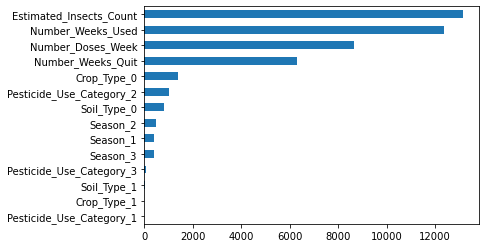

In [186]:
fi = pd.Series(index = X.columns, data = pp1.feature_importances_)
fi.sort_values(ascending=False)[0:20][::-1].plot(kind = 'barh')

In [188]:
fi = pd.Series(index = X.columns, data = pp1.feature_importances_)
fi

Estimated_Insects_Count     13157
Number_Doses_Week            8637
Number_Weeks_Used           12360
Number_Weeks_Quit            6281
Crop_Type_0                  1370
Crop_Type_1                     6
Soil_Type_0                   801
Soil_Type_1                    10
Pesticide_Use_Category_1        0
Pesticide_Use_Category_2     1011
Pesticide_Use_Category_3       87
Season_1                      405
Season_2                      475
Season_3                      400
dtype: int32